In [6]:
# svm_mnist.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from torchvision import datasets, transforms

# ----------------------------
# 关键：使用Windows自带的中文字体（确保存在）
# ----------------------------
plt.rcParams["font.family"] = ["SimSun", "SimHei", "Microsoft YaHei"]  # 宋体、黑体、微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# ========================
# 1. 数据加载与预处理
# ========================
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# 转换为 numpy 格式
X_train = train_dataset.data.numpy().reshape(-1, 28*28) / 255.0
y_train = train_dataset.targets.numpy()
X_test = test_dataset.data.numpy().reshape(-1, 28*28) / 255.0
y_test = test_dataset.targets.numpy()

# 为了加快训练（SVM在大数据上较慢），可选取部分数据
n_samples = 10000
X_train, y_train = X_train[:n_samples], y_train[:n_samples]



In [2]:
# ========================
# 2. 训练 SVM 分类器
# ========================
print("正在训练 SVM 模型（可能需要几分钟）...")
clf = svm.SVC(kernel='rbf', gamma=0.05)
clf.fit(X_train, y_train)

# ========================
# 3. 模型预测
# ========================
y_pred = clf.predict(X_test)

# ========================
# 4. 模型评估
# ========================
print("\n分类报告：")
print(metrics.classification_report(y_test, y_pred))

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"测试集准确率：{accuracy*100:.2f}%")

正在训练 SVM 模型（可能需要几分钟）...

分类报告：
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.94      0.97      0.95      1032
           3       0.96      0.96      0.96      1010
           4       0.96      0.97      0.96       982
           5       0.98      0.95      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.94      0.96      0.95       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.96      0.97     10000
weighted avg       0.97      0.97      0.97     10000

测试集准确率：96.53%


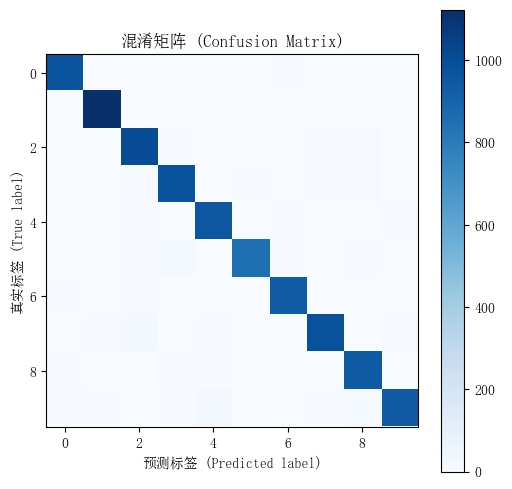

In [8]:
# ========================
# 5. 混淆矩阵可视化
# ========================
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("混淆矩阵 (Confusion Matrix)")
plt.colorbar()
plt.xlabel("预测标签 (Predicted label)")
plt.ylabel("真实标签 (True label)")
plt.show()